In [1]:
import sys, os
import numpy as np
sys.path.append(os.path.abspath('..'))
import pandas as pd
import matplotlib.pyplot as plt
from market_core import DuopolyEnv
from utils import run_episode, plot_generalized_convergence, plot_market_shares
from agent_zoo import RLAgent, ConstrainedRLAgent

In [2]:
# Environment configuration (static market)
env_config = {
    'market_mode': 'static',
    'production_costs': [1.0, 2.0],
    'quality': [5.0, 5.0],
    'price_sensitivity': 0.8,
    'max_price': 6.0,
    'cost_std': 0.0,
    'max_steps': 10000
}

In [3]:
# Baseline RL configurations. Tune these if you want faster runs or different behaviours.
rl_config = {
    'state_dim': 5,
    'hidden_dim': 128,
    'n_bins': 100,
    'lr': 5e-5,
    'gamma': 0.99,
    'epsilon': 1.0,
    'epsilon_decay': 0.99,
    'epsilon_min': 0.01,
    'batch_size': 64,
    'memory_size': 2000,
}

In [4]:
# Create environment and warm it up
env = DuopolyEnv(config=env_config)
env.reset()

/usr/local/lib/python3.11/site-packages/gymnasium/spaces/box.py:236: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.11/site-packages/gymnasium/spaces/box.py:306: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


(array([0., 0., 0., 1., 2.], dtype=float32), {})


Running RL_vs_RL
Saved train history -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/RL_vs_RL_train.csv
Saved eval history  -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/RL_vs_RL_eval.csv
Saved train history -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/RL_vs_RL_train.csv
Saved eval history  -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/RL_vs_RL_eval.csv
Average best price P1: 3.9455495495495496
Average best price P2: 4.20847987987988
Average best price P1: 3.9455495495495496
Average best price P2: 4.20847987987988


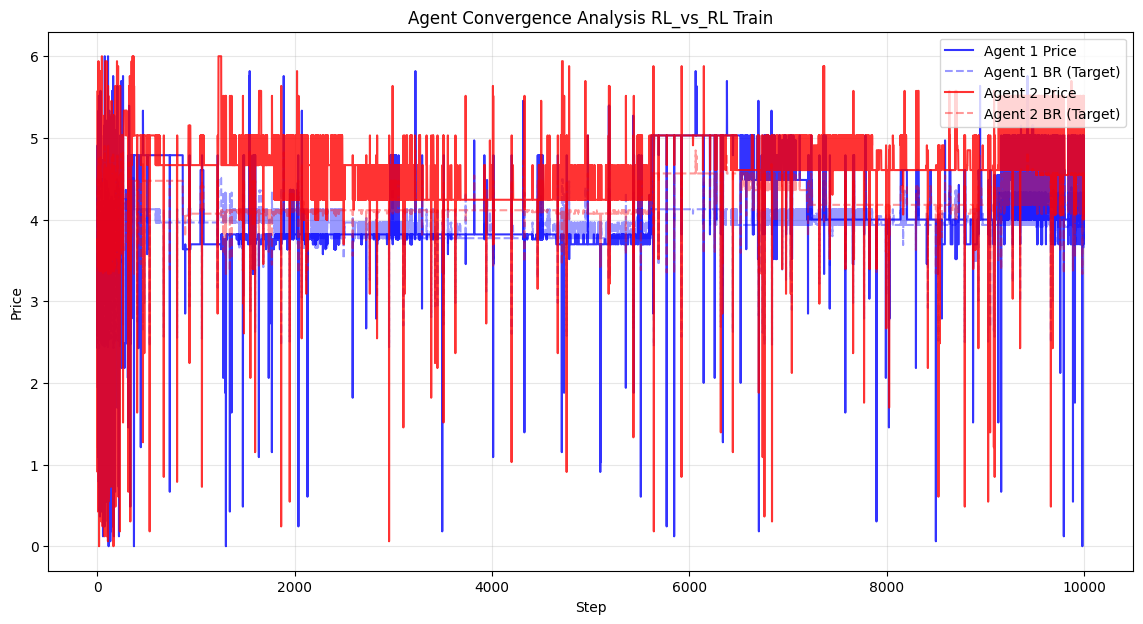

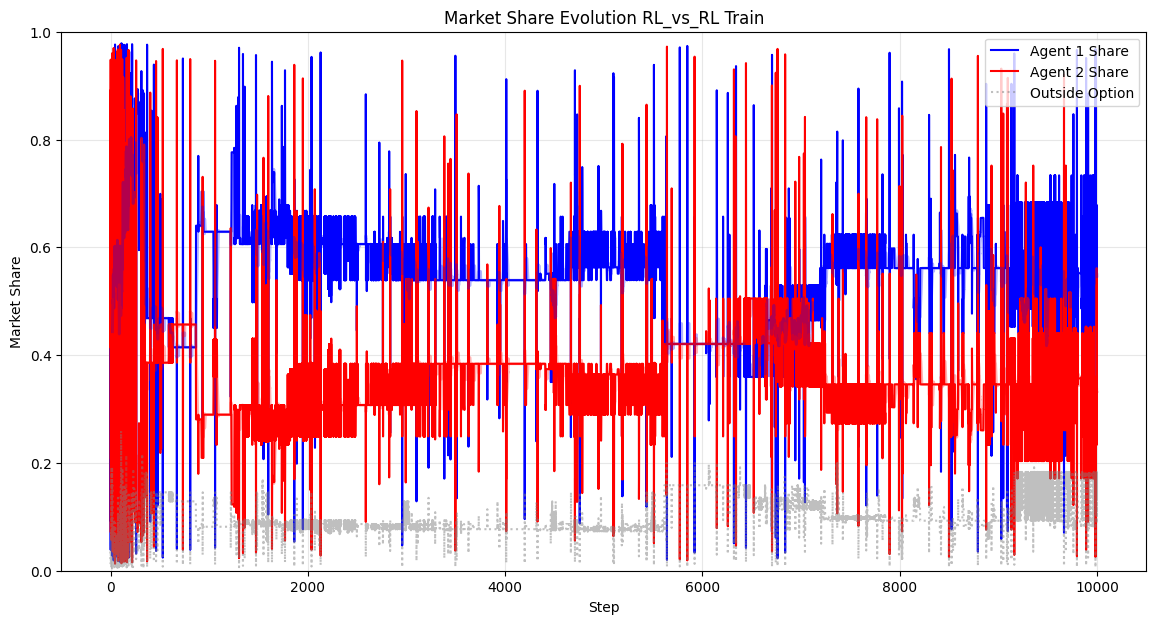

Average best price P1: 4.194199999999999
Average best price P2: 4.384393393393394


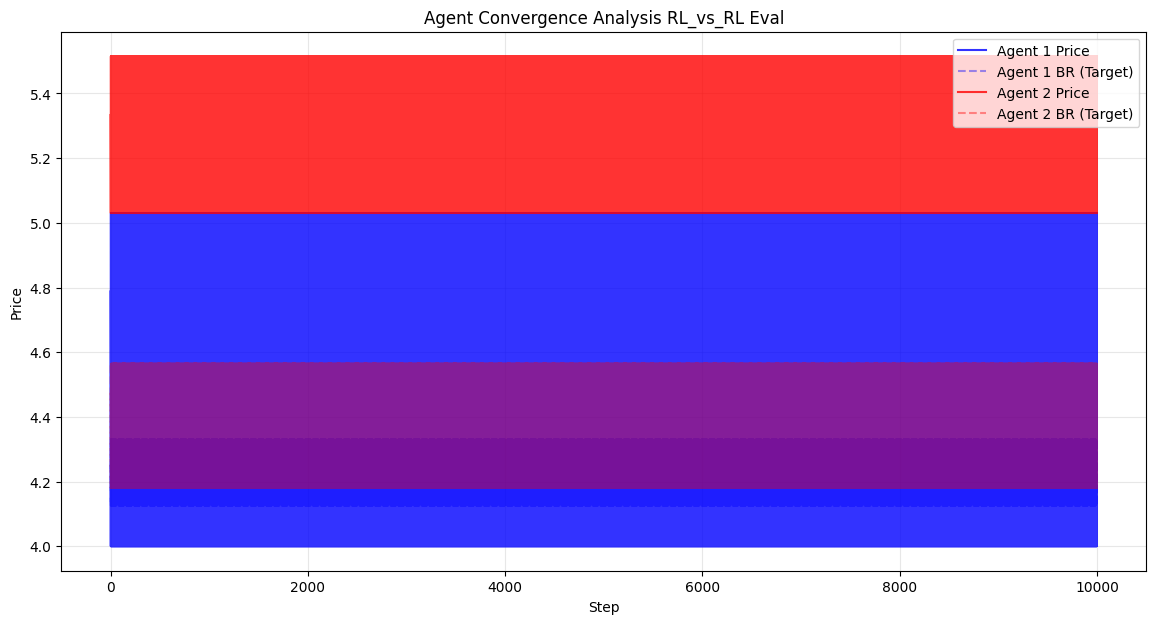

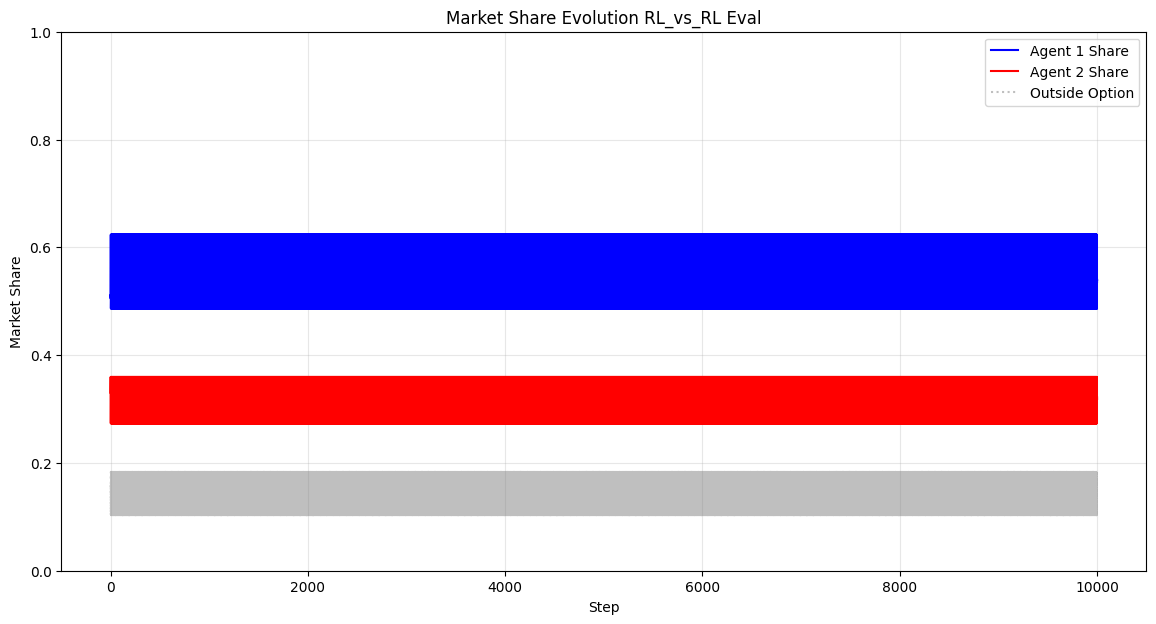


Running RL_vs_ConstrainedRL
Saved train history -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/RL_vs_ConstrainedRL_train.csv
Saved eval history  -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/RL_vs_ConstrainedRL_eval.csv
Saved train history -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/RL_vs_ConstrainedRL_train.csv
Saved eval history  -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/RL_vs_ConstrainedRL_eval.csv
Average best price P1: 3.8425081081081087
Average best price P2: 4.173031831831832
Average best price P1: 3.8425081081081087
Average best price P2: 4.173031831831832


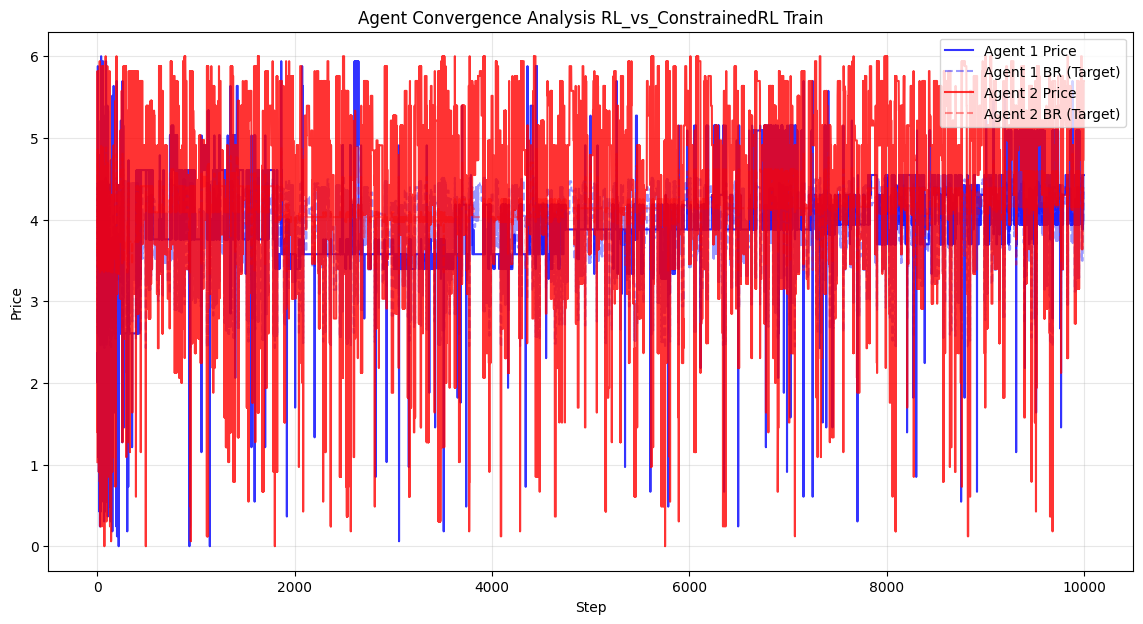

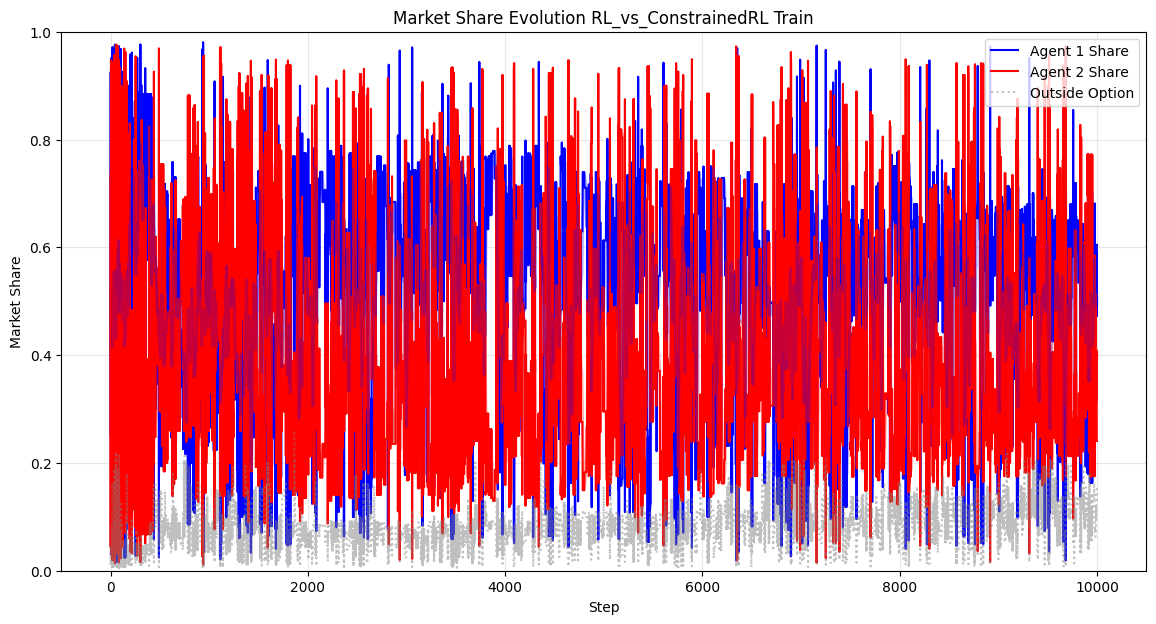

Average best price P1: 4.396230030030031
Average best price P2: 4.384347747747747


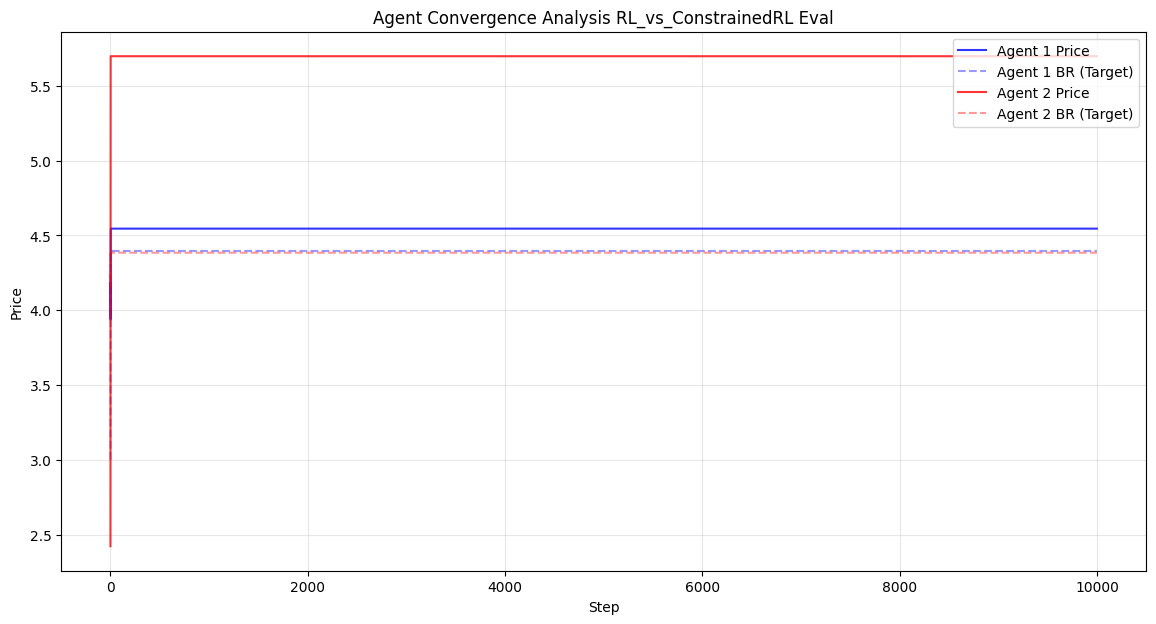

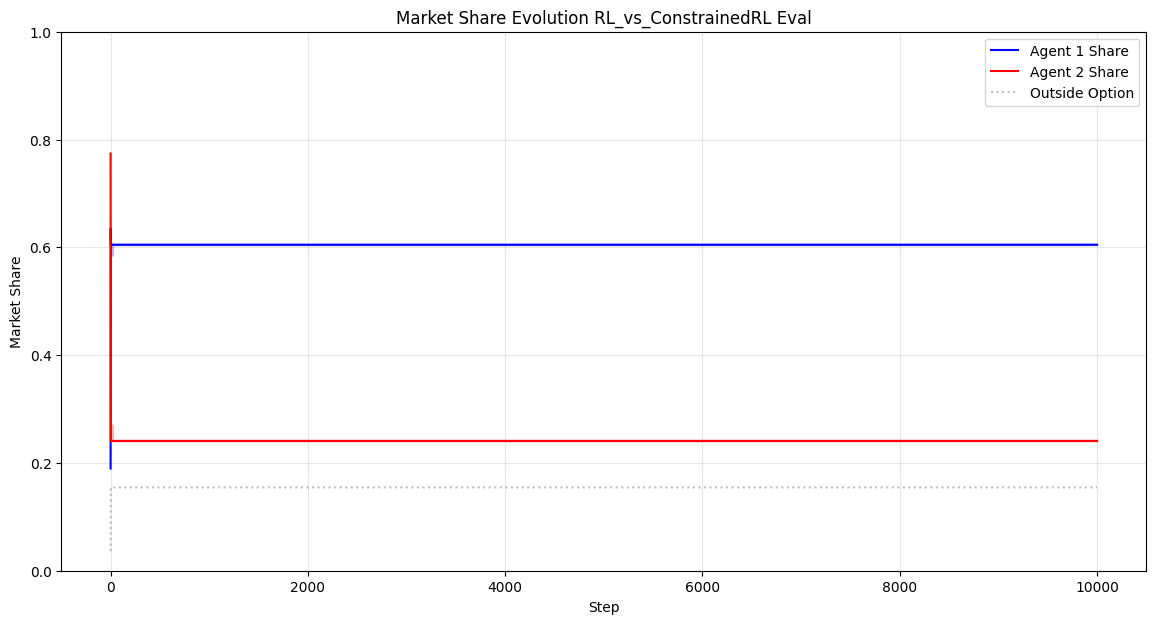


Running ConstrainedRL_vs_RL
Saved train history -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/ConstrainedRL_vs_RL_train.csv
Saved eval history  -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/ConstrainedRL_vs_RL_eval.csv
Saved train history -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/ConstrainedRL_vs_RL_train.csv
Saved eval history  -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/ConstrainedRL_vs_RL_eval.csv
Average best price P1: 3.732694894894895
Average best price P2: 4.053107507507507
Average best price P1: 3.732694894894895
Average best price P2: 4.053107507507507


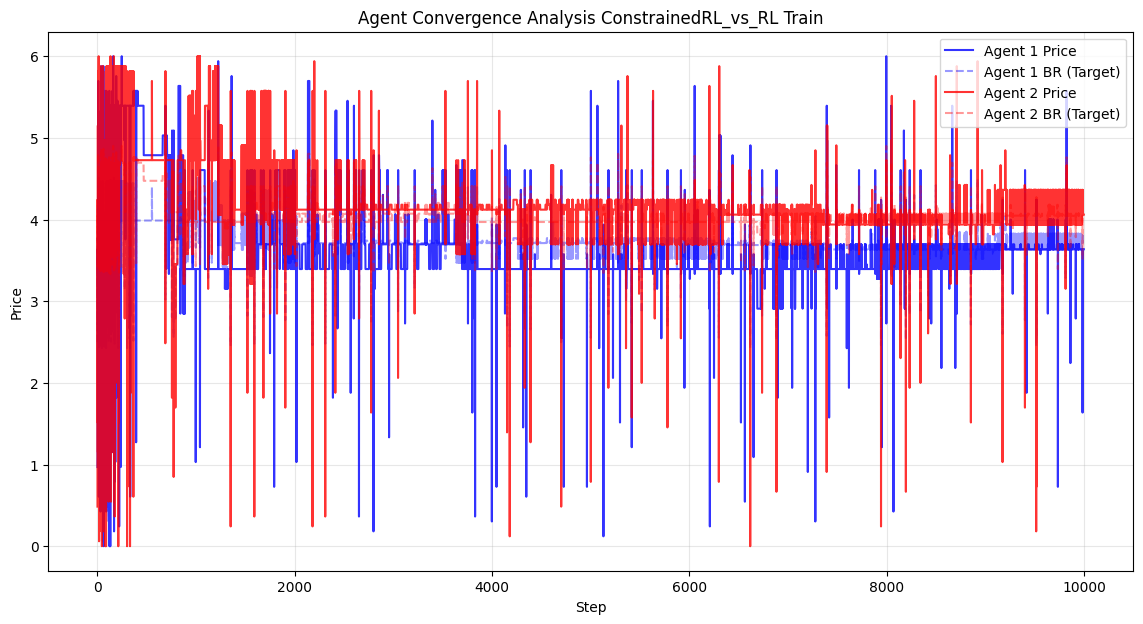

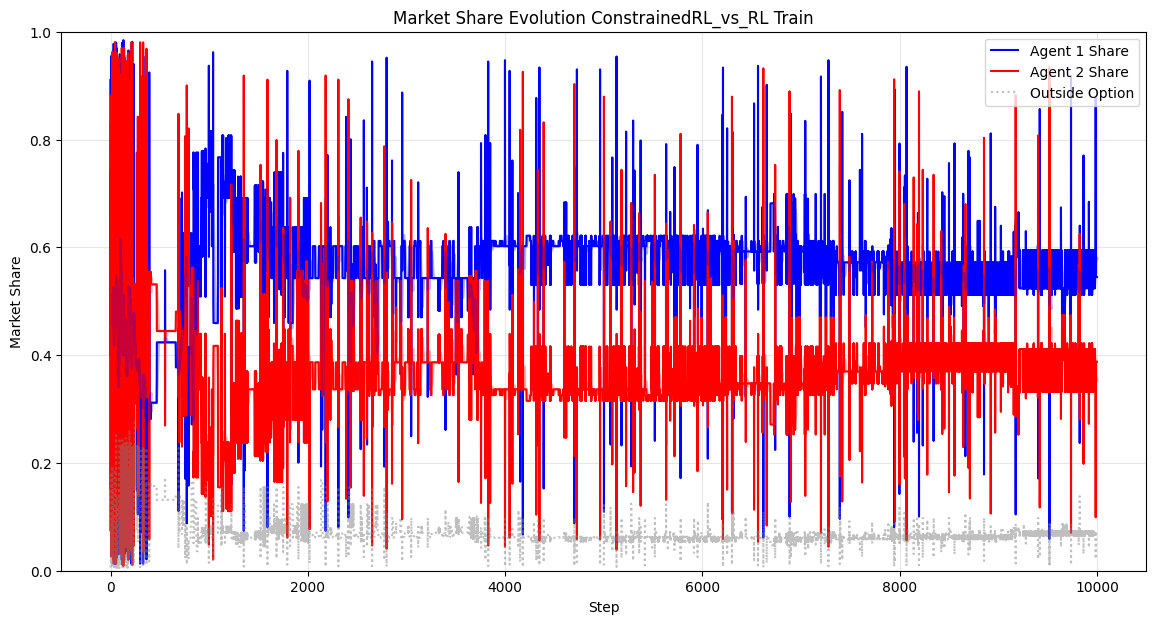

Average best price P1: 3.6336414414414424
Average best price P2: 4.048084084084083


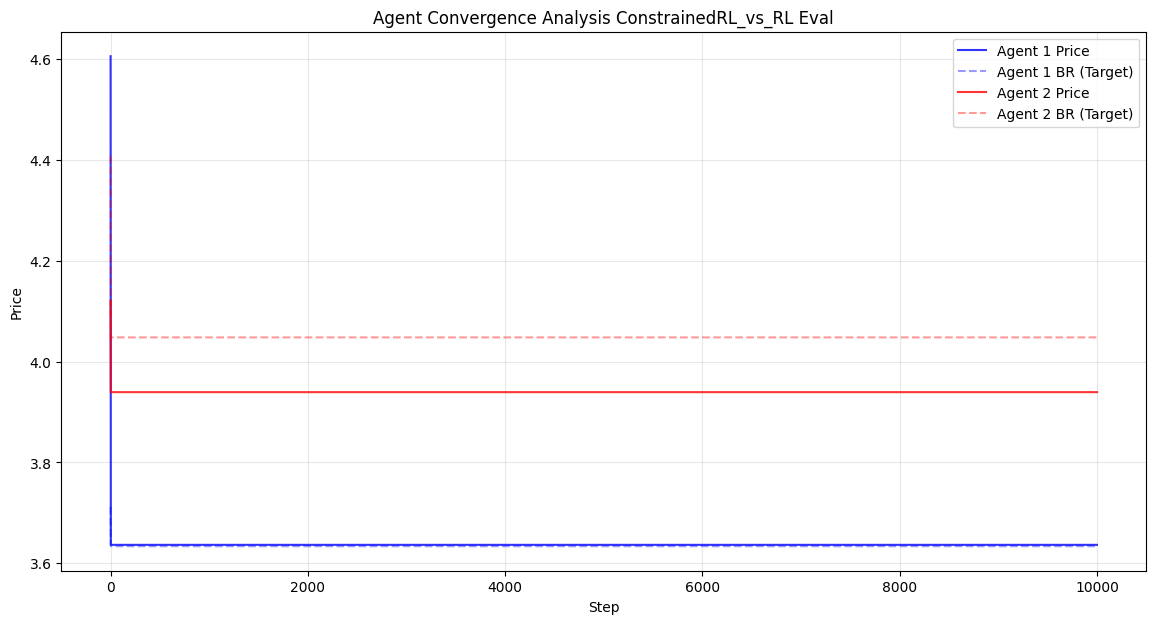

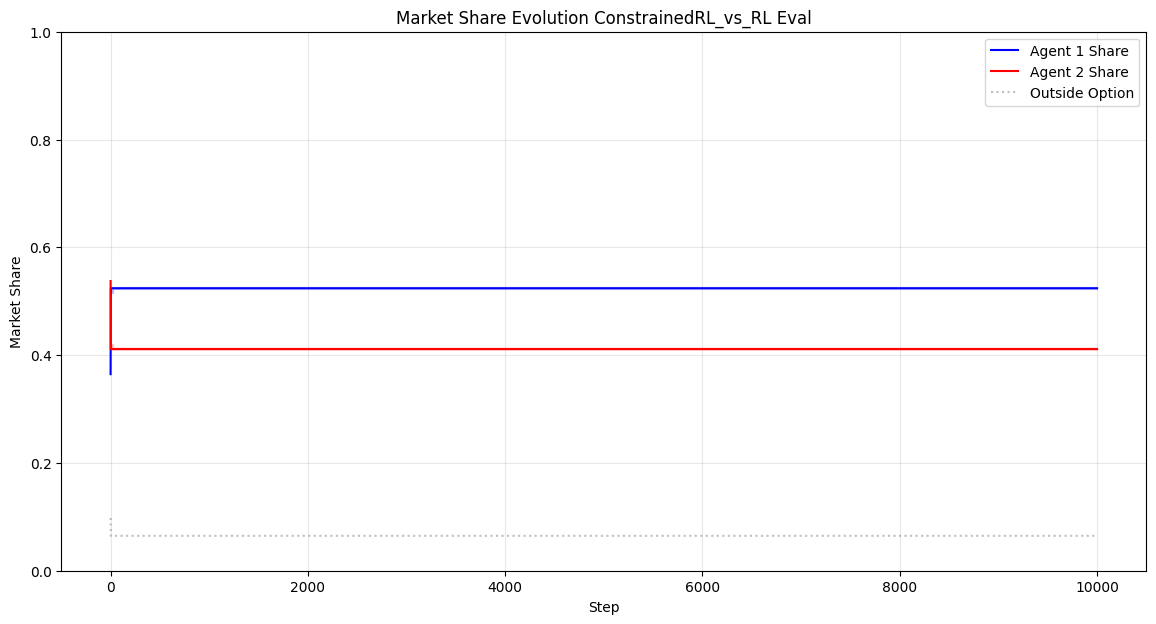


Running ConstrainedRL_vs_ConstrainedRL
Saved train history -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/ConstrainedRL_vs_ConstrainedRL_train.csv
Saved eval history  -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/ConstrainedRL_vs_ConstrainedRL_eval.csv
Saved train history -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/ConstrainedRL_vs_ConstrainedRL_train.csv
Saved eval history  -> /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results/ConstrainedRL_vs_ConstrainedRL_eval.csv
Average best price P1: 3.950804204204204
Average best price P2: 4.114108108108108
Average best price P1: 3.950804204204204
Average best price P2: 4.114108108108108


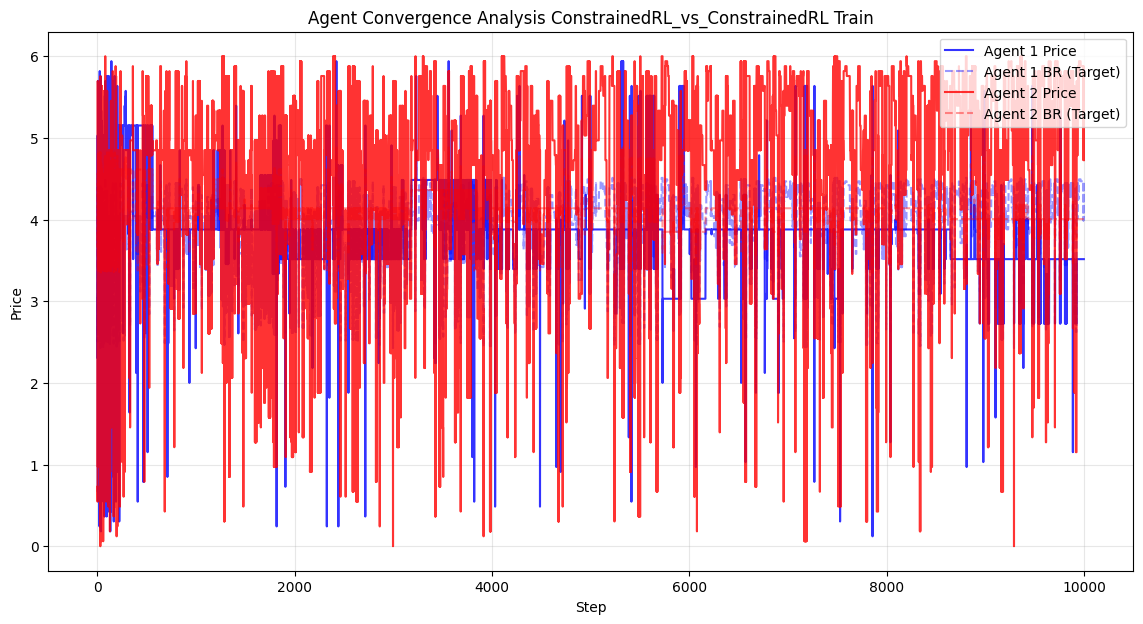

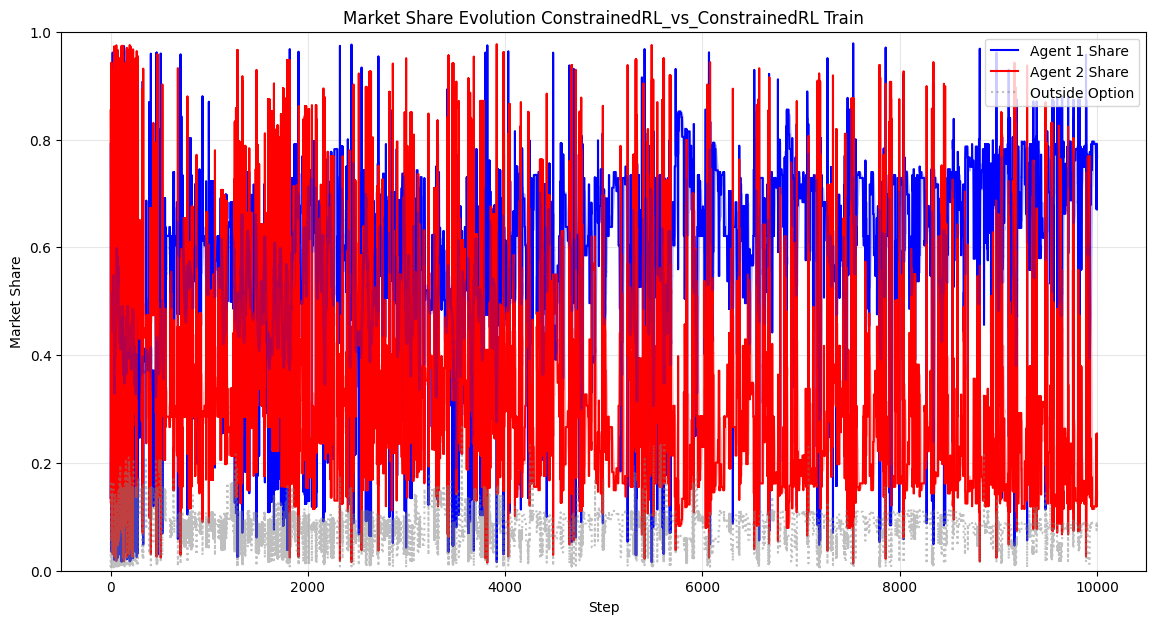

Average best price P1: 3.987845645645644
Average best price P2: 4.006030030030029


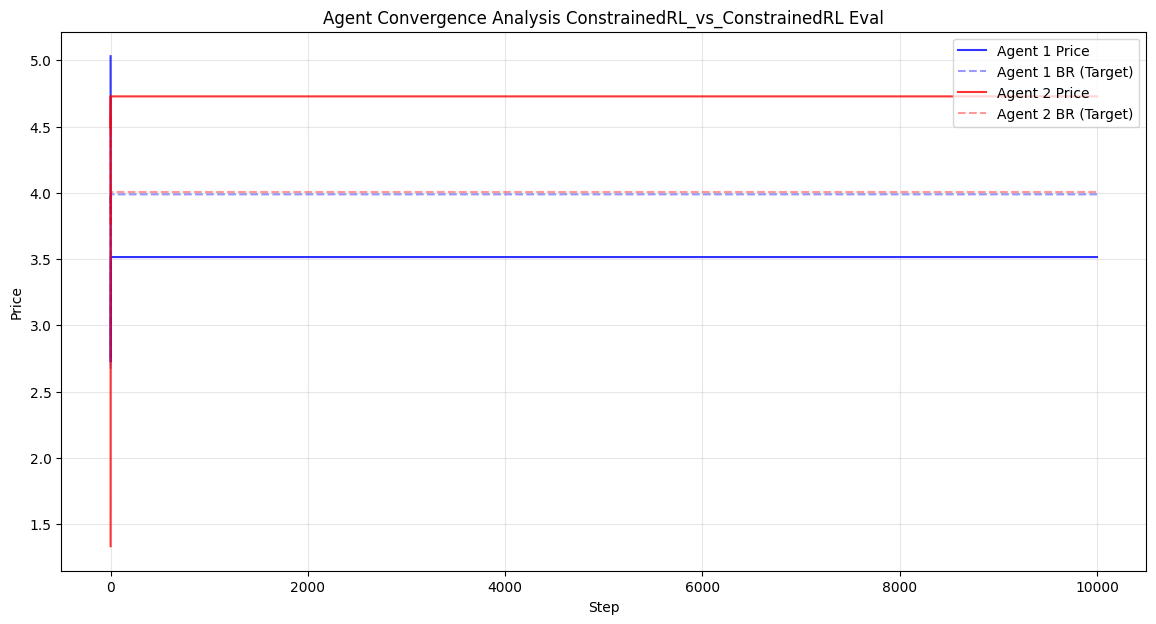

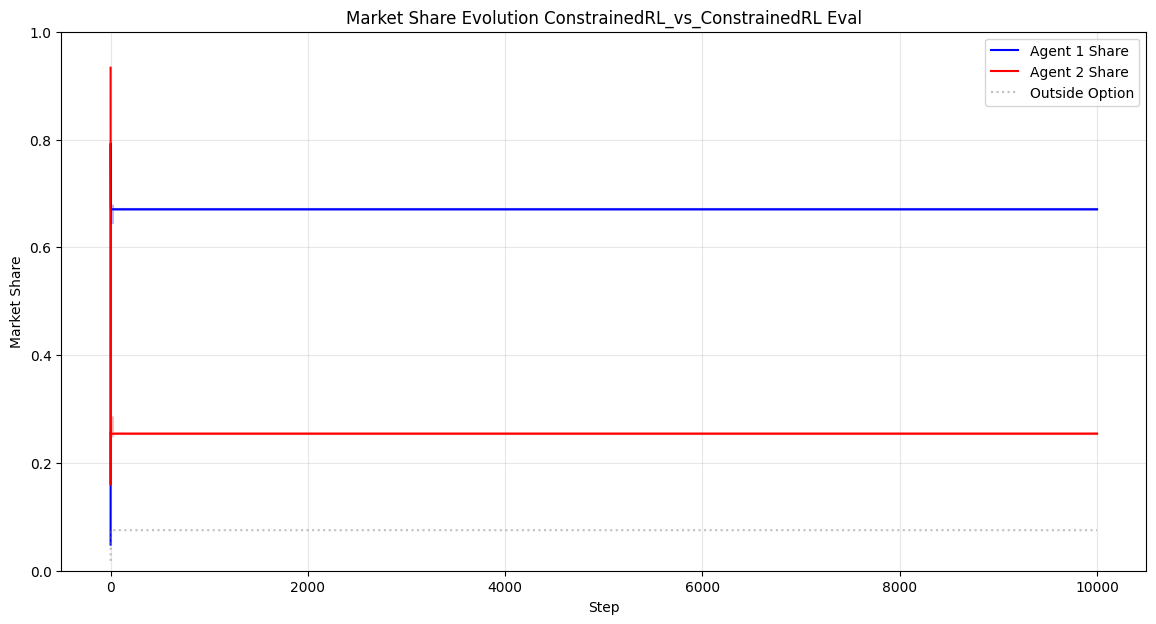


All experiments complete. Results saved in /Users/arihanttripathi/Documents/cis-6200-final-main/market_audit/notebooks/rl_vs_rl_results


In [6]:
# Define agent classes to test
agent_classes = [ ('RL', RLAgent), ('ConstrainedRL', ConstrainedRLAgent) ]
results_dir = os.path.abspath('rl_vs_rl_results')
os.makedirs(results_dir, exist_ok=True)
all_histories = {}
# Loop over all ordered pairs (including same vs same)
for name1, cls1 in agent_classes:
    for name2, cls2 in agent_classes:
        pair_label = f'{name1}_vs_{name2}'
        print('\nRunning', pair_label)
        # Instantiate fresh agents for each pair
        a1 = cls1(env.action_space, config=dict(rl_config))
        a2 = cls2(env.action_space, config=dict(rl_config))

        # Run episode (training mode)
        hist_train = run_episode(env, a1, a2, label=pair_label + '_train', train_mode=True)

        # After training, run an evaluation episode (no exploration, no updates)
        hist_eval = run_episode(env, a1, a2, label=pair_label + '_eval', train_mode=False)

        # Save train and eval histories
        fname_train = os.path.join(results_dir, f'{pair_label}_train.csv')
        fname_eval = os.path.join(results_dir, f'{pair_label}_eval.csv')
        hist_train.to_csv(fname_train, index=False)
        hist_eval.to_csv(fname_eval, index=False)
        print('Saved train history ->', fname_train)
        print('Saved eval history  ->', fname_eval)

        # Plot both train and eval results
        try:
            plot_generalized_convergence(hist_train, env_config, title_suffix=pair_label + ' Train')
            plot_market_shares(hist_train, env_config, title_suffix=pair_label + ' Train')
            plot_generalized_convergence(hist_eval, env_config, title_suffix=pair_label + ' Eval')
            plot_market_shares(hist_eval, env_config, title_suffix=pair_label + ' Eval')
        except Exception as e:
            print('Plotting failed for', pair_label, 'with error:', e)

        all_histories[pair_label] = {'train': hist_train, 'eval': hist_eval}

print('\nAll experiments complete. Results saved in', results_dir)


## Next steps
- To run faster for quick debugging, lower `env_config['max_steps']` or reduce `rl_config['n_bins']` and `hidden_dim`.
- You can open the CSVs in `rl_vs_rl_results/` for detailed analysis or aggregate them into a single summary table.